# Setup

In [5]:

from pathlib import Path
import os
import pprint
import pandas as pd
import pygwalker as pyg
import dabl

import sys
from pathlib import Path
#### For Path setup
def setup_project_path():
    """프로젝트 루트 경로를 찾아서 파이썬 경로에 추가"""
    current = Path.cwd()
    while current != current.parent:
        if (current / '.git').exists():
            if str(current) not in sys.path:
                sys.path.append(str(current))
                print(f'Project root found: {current}')
            return current
        current = current.parent
    return None

# 프로젝트 경로 설정
project_root = setup_project_path()
if project_root is None:
    # 프로젝트 루트를 찾지 못했다면 직접 지정
    project_root = Path("D:/dev/upstageailab5-ml-regression-ml_r4")
    if str(project_root) not in sys.path:
        sys.path.append(str(project_root))

#jupyter nbextension enable --py widgetsnbextension

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


Project root found: /data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4


In [6]:
project_root

PosixPath('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4')

In [7]:
from src.logger import Logger
from src.preprocessing import DataPrep
from src.eda import EDA
from src.feature import FeatureEngineer, Clustering, XAI
from src.train import Model
from src.visualization import Visualizer
from src.utils import Utils, PathManager
## memory management
import gc
gc.collect()
########################################################################################################################################
logger_instance = Logger()
logger = logger_instance.logger
utils = Utils(logger)
utils.setup_font_and_path_platform()
current_platform = utils.current_platform
#os.environ['PYTHONPATH'] = r'D:\dev\upstageailab5-ml-regression-ml_r4'
current_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
logger.info(f'#### Current workspalce: {current_path}')
if current_platform == 'Windows':
    base_path = Path(r'D:\dev\upstageailab5-ml-regression-ml_r4')
    logger.info(f'{current_platform} platform. Path: {base_path}')
elif current_platform == 'Darwin':          # Mac
    base_path = Path('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4')
    logger.info(f'{current_platform} platform. Path: {base_path}')
else:
    base_path = Path('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4')    # Linux
    logger.info(f'{current_platform} platform. Path: {base_path}')
########################################################################################################################################

########################################################################################################################################
### Data Prep

pm = PathManager(base_path)
pm.config


2024-11-12 21:00:26,279 - root - INFO - Initialized Logger.
2024-11-12 21:00:26,280 - root - INFO - Linux platform. Font: ['NanumGothic']
2024-11-12 21:00:26,281 - root - INFO - #### Current workspalce: /data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4
2024-11-12 21:00:26,281 - root - INFO - Linux platform. Path: /data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4


{'name': {'dataset_name': 'feat_all3',
  'split_type': 'cross_validation',
  'model_name': 'lightgbm'},
 'target': 'target',
 'thr_ratio_outlier': 0.01,
 'thr_ratio_null': 0.9,
 'thr_detect_categorical': '1e-7',
 'thr_null': 1000000,
 'time_delay': 3,
 'random_seed': 2024,
 'model_params': {'n_estimators': 3000, 'max_depth': 5, 'learning_rate': 0.01},
 'data_paths': {'train': 'data/train.csv', 'test': 'data/test.csv'},
 'features': ['feature1', 'feature2', 'feature3'],
 'wandb': {'project': 'project-regression_house_price',
  'entity': 'joon',
  'group': 'group-ml4'},
 'sweep_configs': {'xgboost': {'method': 'bayes',
   'metric': {'name': 'rmse', 'goal': 'minimize'},
   'parameters': {'eta': 0.3,
    'max_depth': 10,
    'subsample': 0.6239,
    'colsample_bytree': 0.5305,
    'gamma': 4.717,
    'reg_lambda': 5.081,
    'alpha': 0.4902,
    'n_estimators': 551}},
  'random_forest': {'method': 'bayes',
   'metric': {'name': 'rmse', 'goal': 'minimize'},
   'parameters': {'n_estimators':

In [9]:
# PathManager에서 경로 가져오기
data_path = pm.get_path('data', as_str=True)
prep_path = pm.get_path('processed_path', as_str=True)
output_path = pm.get_path('output', as_str=True)

# 설정 딕셔너리 생성
config = {   
    'out_path': output_path,
    'base_path': str(pm.base_path),
    'data_paths': {
        'subway_feature': str(Path(data_path) / 'subway_feature.csv'),
        'bus_feature': str(Path(data_path) / 'bus_feature.csv'),
    },
    'prep_paths': {
        'baseline': str(Path(prep_path) / 'df_baseline.csv'),
        'interpolation': str(Path(prep_path) / 'df_interpolation.csv'),
    },
    'logger': logger_instance
}

# 필요한 경우 개별 경로 접근
path_baseline = config['prep_paths']['baseline']


config.update(pm.paths)
pprint.pprint(config)

{'base_path': '/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4',
 'config': PosixPath('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4/config'),
 'data': PosixPath('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4/data'),
 'data_paths': {'bus_feature': '/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4/data/bus_feature.csv',
                'subway_feature': '/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4/data/subway_feature.csv'},
 'logger': <src.logger.Logger object at 0x7fe5f44b4f40>,
 'logs': PosixPath('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4/logs'),
 'models_path': PosixPath('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4/output/models'),
 'out_path': '/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4/output',
 'output': PosixPath('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4/output'),
 'prep_paths': {'baseline': '/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4/dat

In [ ]:
pre_pa

## Setup Path

In [4]:
 ####
# column_types =Utils.detect_column_types(df_feat, unique_ratio_threshold=1e-7, exclude_cols=['is_test', 'target'])
# # 0.0000001 일때 is_numeric_dtype 과 비슷한 결과 나옴.
# categorical_features = column_types['categorical']
# numerical_features = column_types['numerical']   

In [10]:
## 데이터 불러오기
df = pd.read_csv(os.path.join(prep_path, 'df_combined_distance_feature_after_null_fill_transport.csv'), index_col=0)
#df_interpolation = pd.read_csv(os.path.join(prep_path, 'df_interpolation.csv'), index_col=0)


In [17]:
print(df.isnull().sum())


def get_columns_with_nulls(df):
    # 각 컬럼의 null 개수 계산
    null_counts = df.isnull().sum()
    
    # null 값이 하나라도 있는 컬럼 선택
    columns_with_nulls = null_counts[null_counts > 0].index.tolist()
    
    return columns_with_nulls

cols_null=get_columns_with_nulls(df)



시군구                                0
번지                               227
본번                                75
부번                                75
아파트명                            2136
                                ... 
bus_station_area_count             0
bus_direct_influence_count         0
bus_indirect_influence_count       0
bus_shortest_distance              0
bus_zone_type                      0
Length: 72, dtype: int64


In [ ]:
df.columns

['번지','본번', '부번', 'k-전화번호', 'k-팩스번호']

cols_exclude =['등기신청일자','거래유형','중개사소재지'] + ['k-팩스번호',
                       'k-전화번호',
                       'k-홈페이지',
                       '고용보험관리번호',
                       '단지소개기존clob']



Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target', 'is_test', '주소', '시', '구', '동',
       'gangnam_apt_shortest_distance', 'gangnam_apt_zone_type', '대장_좌표X',
       '대장_좌표Y', '대장아파트_거리', 'subway_station_area_count',
       'subway_direct_influence_count', 'subway_indirect_influence_count',
       'subway_shortest_distance', 'subway_zone_type',
       'bus_station_area_count', 'bus_direct_influence_count',
       'bus_i

In [19]:
len(cols_null)

40

In [6]:
print(f'df_raw.columns: {len(df_raw.columns)}, {df_raw.columns}')
print(f'df_interpolation.columns: {len(df_interpolation.columns)}, {df_interpolation.columns}')

df_raw.columns: 53, Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target', 'is_test'],
      dtype='object')
df_interpolation.columns: 42, Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)'

# Prep & Feature

In [44]:
df_raw.describe()


,본번,부번,전용면적,계약년월,계약일,층,건축년도,해제사유발생일,단지소개기존clob,k-전체동수,...,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,건축면적,주차대수,좌표X,좌표Y,target,is_test
count,1.128019e+06,1.128019e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,6.195000e+03,69136.000000,250887.000000,...,251924.000000,251924.000000,251924.000000,329.0,2.518150e+05,251817.000000,251862.000000,251862.000000,1.118822e+06,1.128094e+06
mean,5.653234e+02,5.976400e+00,7.716028e+01,2.014829e+05,1.579966e+01,8.881412e+00,1.998791e+03,2.021126e+07,541.272911,14.810871,...,478.582326,478.585657,167.784911,70.0,1.904915e+05,1068.300798,126.995315,37.545760,5.799153e+04,8.219173e-03
std,5.167611e+02,4.674920e+01,2.936448e+01,4.237691e+02,8.722162e+00,5.989302e+00,9.358540e+00,1.105703e+04,751.682988,17.682771,...,758.970556,731.168009,249.626494,0.0,1.735029e+06,1247.315587,0.091001,0.052457,4.642602e+04,9.028635e-02
min,0.000000e+00,0.000000e+00,1.002000e+01,2.007010e+05,1.000000e+00,-4.000000e+00,1.961000e+03,2.020022e+07,1.000000,1.000000,...,0.000000,0.000000,0.000000,70.0,0.000000e+00,0.000000,126.798318,37.447843,3.500000e+02,0.000000e+00
25%,1.770000e+02,0.000000e+00,5.965000e+01,2.011110e+05,8.000000e+00,4.000000e+00,1.992000e+03,2.020083e+07,4.000000,5.000000,...,48.000000,95.000000,0.000000,70.0,0.000000e+00,316.000000,126.913157,37.498830,3.050000e+04,0.000000e+00
50%,4.710000e+02,0.000000e+00,8.187000e+01,2.015080e+05,1.600000e+01,8.000000e+00,2.000000e+03,2.021032e+07,159.000000,10.000000,...,226.000000,258.000000,64.000000,70.0,1.735000e+03,683.000000,127.014971,37.544936,4.480000e+04,0.000000e+00
75%,7.810000e+02,1.000000e+00,8.496000e+01,2.018050e+05,2.300000e+01,1.200000e+01,2.005000e+03,2.022050e+07,725.000000,17.000000,...,576.000000,582.000000,237.000000,70.0,8.414210e+03,1284.000000,127.059590,37.577117,6.980000e+04,0.000000e+00
max,4.974000e+03,2.837000e+03,4.243200e+02,2.023090e+05,3.100000e+01,6.900000e+01,2.023000e+03,2.023093e+07,2888.000000,124.000000,...,4975.000000,5132.000000,1500.000000,70.0,3.159620e+07,12096.000000,127.179998,37.687725,1.450000e+06,1.000000e+00


In [45]:
df_null_prep = pd.read_csv(os.path.join(prep_path, 'df_raw_null_prep_coord.csv'), index_col=0)

In [278]:
    
### Feature 1. 강남구 파생변수, 신축여부
feat_baseline = pd.read_csv(os.path.join(prep_path, 'feat_baseline.csv'))
### Feature 2. 교통 및 클러스터링 파생변수
feat_transport = pd.read_csv(os.path.join(prep_path, 'feat_transport.csv'))
#feat_cluster = pd.read_csv(os.path.join(prep_path, 'feat_cluster.csv'))
### Feature 3. 대장 아파트 거리
feat_gangnam_apt_dist = pd.read_csv(os.path.join(prep_path, 'feat_gangnam_apt_dist.csv'), index_col=0)

df_result = pd.concat(
    [
        df_interpolation.reset_index(drop=True),
        feat_baseline.reset_index(drop=True),
        #feat_cluster.reset_index(drop=True),
        feat_transport.reset_index(drop=True),
        feat_gangnam_apt_dist.reset_index(drop=True)
    ],
    axis=1
)

cols_feat_baseline = feat_baseline.columns
#cols_feat_cluster = feat_cluster.columns
cols_feat_transport = feat_transport.columns
cols_feat_gangnam_apt_dist = feat_gangnam_apt_dist.columns


# # cols_to_drop = ['시군구','계약년월']
# # df_new.drop(columns=cols_to_drop, inplace=True)

In [279]:
df_result.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'is_test', '구',
       '동', '계약년', '계약월', '강남여부', '신축여부', 'subway_station_area_count',
       'subway_direct_influence_count', 'subway_indirect_influence_count',
       'subway_shortest_distance', 'subway_zone_type',
       'bus_station_area_count', 'bus_direct_influence_count',
       'bus_indirect_influence_count', 'bus_shortest_distance',
       'bus_zone_type'],
      dtype='object')

In [272]:
df_result.shape
df_result.head(1)
df_result.to_csv(os.path.join(prep_path, 'df_feat_all3.csv'), index=False)
#print(f'{len(cols_feat_baseline)} {cols_feat_baseline}\n{len(cols_feat_cluster)} {cols_feat_cluster}\n{len(cols_feat_transport)} {cols_feat_transport}')

# Feature 3. Gangnam APT

In [62]:
df_combined = pd.read_csv(os.path.join(prep_path, 'df_combined_distance_feature_after_null_fill_complete.csv'), index_col=0)

In [64]:
df_transport = pd.read_csv(os.path.join(prep_path, 'df_combined_distance_feature_after_null_fill_transport.csv'), index_col=0)



In [ ]:
['등기신청일자','거래유형','중개사소재지'] + ['k-팩스번호',
                       'k-전화번호',
                       'k-홈페이지',
                       '고용보험관리번호',
                       '단지소개기존clob']

In [66]:
df_transport.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,subway_station_area_count,subway_direct_influence_count,subway_indirect_influence_count,subway_shortest_distance,subway_zone_type,bus_station_area_count,bus_direct_influence_count,bus_indirect_influence_count,bus_shortest_distance,bus_zone_type
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,201712,8,3,1987,...,0,0,7,699.547185,3,5,16,150,73.917793,1
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,...,0,0,7,699.547185,3,5,16,150,73.917793,1
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,201712,22,4,1987,...,0,0,7,699.547185,3,5,16,150,73.917793,1
3,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,...,0,3,7,303.229871,2,4,26,180,109.787878,1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.9800,201712,28,5,1987,...,0,0,7,699.547185,3,5,16,150,73.917793,1


In [65]:
df_combined.equals(df_transport)


True

In [57]:
df_1 = df_combined['대장아파트_거리']
df_2 = df_combined['gangnam_apt_shortest_distance']



In [60]:
df_combined.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target', 'is_test', '주소', '시', '구', '동',
       'gangnam_apt_shortest_distance', 'gangnam_apt_zone_type', '대장_좌표X',
       '대장_좌표Y', '대장아파트_거리'],
      dtype='object')

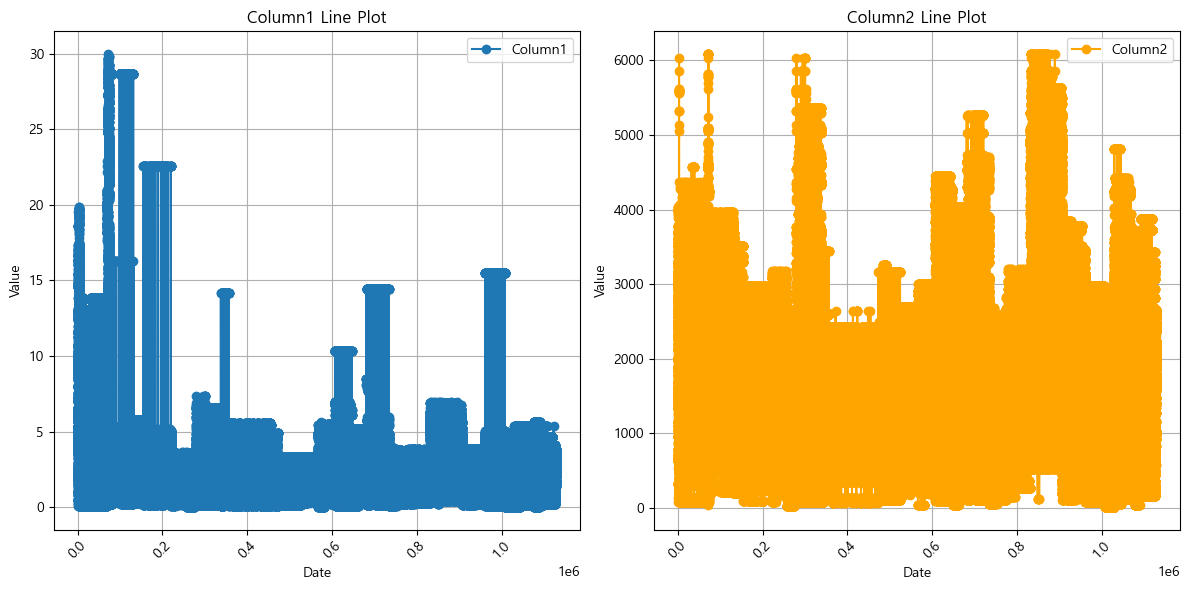

In [59]:

df_diff = df_1-df_2
df_diff.describe()

# 두 컬럼을 나란히 라인 플롯으로 출력
plt.figure(figsize=(12, 6))

# 첫 번째 컬럼
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 플롯
plt.plot(df_combined.index, df_combined['대장아파트_거리'], marker='o', label='Column1')
plt.title('Column1 Line Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# 두 번째 컬럼
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 플롯
plt.plot(df_combined.index, df_combined['gangnam_apt_shortest_distance'], marker='o', color='orange', label='Column2')
plt.title('Column2 Line Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [249]:
import pandas as pd
import math

def prep_feat(concat):
        
    concat['구'] = concat['시군구'].map(lambda x : x.split()[1])
    concat['동'] = concat['시군구'].map(lambda x : x.split()[2])
    
    concat['계약년'] = concat['계약년월'].astype('str').map(lambda x : x[:4])
    concat['계약월'] = concat['계약년월'].astype('str').map(lambda x : x[4:])
    #del concat['계약년월']

    all = list(concat['구'].unique())
    gangnam = ['강서구', '영등포구', '동작구', '서초구', '강남구', '송파구', '강동구']
    gangbuk = [x for x in all if x not in gangnam]

    assert len(all) == len(gangnam) + len(gangbuk)       # 알맞게 분리되었는지 체크합니다.

    # 강남의 여부를 체크합니다.
    is_gangnam = []
    for x in concat['구'].tolist() :
        if x in gangnam :
            is_gangnam.append(1)
        else :
            is_gangnam.append(0)

    # 파생변수를 하나 만릅니다.
    concat['강남여부'] = is_gangnam
    # 건축년도 분포는 아래와 같습니다. 특히 2005년이 Q3에 해당합니다.
    # 2009년 이후에 지어진 건물은 10%정도 되는 것을 확인할 수 있습니다.
    concat['건축년도'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])
    
    concat['신축여부'] = concat['건축년도'].apply(lambda x: 1 if x >= 2020 else 0) # 2009
    cols_feat = ['구', '동','계약년', '계약월','강남여부','신축여부']

    concat.head(1)       # 최종 데이터셋은 아래와 같습니다.

    return concat


# 지역구별 대장 아파트들을 입력합니다.
lead_house = {
    "강서구" : (37.56520754904415, 126.82349451366355),
    "관악구" : (37.47800896704934, 126.94178722423047),
    "강남구" : (37.530594054209146, 127.0262701317293),
    "강동구" : (37.557175745977375, 127.16359581113558),
    "광진구" : (37.543083184171, 127.0998363490422),
    "구로구" : (37.51045944660659, 126.88687199829572),
    "금천구" : (37.459818907487936, 126.89741481874103),
    "노원구" : (37.63952738902813, 127.07234254197617),
    "도봉구" : (37.65775043994647, 127.04345013224447),
    "동대문구" : (37.57760781415707, 127.05375628992316),
    "동작구" : (37.509881249641495, 126.9618159122961),
    "마포구" : (37.54341664563958, 126.93601641235335),
    "서대문구" : (37.55808950436837, 126.9559315685538),
    "서초구" : (37.50625410912666, 126.99846468032919),
    "성동구" : (37.53870643389788, 127.04496220606433),
    "성북구" : (37.61158435092128, 127.02699796439015),
    "송파구" : (37.512817775046074, 127.08340371063358),
    "양천구" : (37.526754982736556, 126.86618704123521),
    "영등포구" : (37.52071403351804, 126.93668907644046),
    "용산구" : (37.521223570097305, 126.97345317787784),
    "은평구" : (37.60181702377437, 126.9362806808709),
    "종로구" : (37.56856915384472, 126.96687674967252),
    "중구" : (37.5544678205846, 126.9634879236162),
    "중랑구" : (37.58171824083332, 127.08183326205129),
    "강북구" : (37.61186335979484, 127.02822407466175)
}

# 위경도를 이용해 두 지점간의 거리를 구하는 함수를 생성합니다.
def haversine_distance(lat1, lon1, lat2, lon2):
    radius = 6371.0

    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = radius * c
    return distance


### Feature 3. 대장 아파트 거리
# 대장 아파트의 위경도 데이터프레임을 구성합니다.
lead_house_data = pd.DataFrame([{"구": k, "대장_좌표X": v[1], "대장_좌표Y": v[0]} for k, v in lead_house.items()])
# 데이터프레임간 결합을 합니다.
house_data = pd.merge(df_result, lead_house_data, how="inner", on="구")
# 아까 제작한 haversine_distance 함수를 이용해 대장아파트와의 거리를 계산하고, 새롭게 컬럼을 구성합니다.
house_data['대장아파트_거리'] = house_data.apply(lambda row: haversine_distance(row["좌표Y"], row["좌표X"], row["대장_좌표Y"], row["대장_좌표X"]), axis=1)

# 20개의 샘플을 뽑아 확인해봅니다.
sample_data = house_data[house_data["대장아파트_거리"].isnull() == False].sample(n=20)
sample_data[["시군구", "아파트명", "대장아파트_거리", "target"]]




,시군구,아파트명,대장아파트_거리,target
177627,서울특별시 노원구 중계동,주공10,0.650810,34000.0
297627,서울특별시 강서구 화곡동,미성,2.298508,46000.0
798616,서울특별시 성북구 보문동3가,이편한세상보문,3.365780,53500.0
563496,서울특별시 동대문구 장안동,장안평월드메르디앙2차,1.878854,35500.0
119043,서울특별시 노원구 월계동,세양청마루,2.320797,39700.0
1094240,서울특별시 중랑구 면목동,동진노블클래스,0.920742,26800.0
302922,서울특별시 강서구 화곡동,벨라팰리스,2.298508,18200.0
739900,서울특별시 성동구 행당동,서울숲삼부,2.458524,57300.0
706231,서울특별시 서초구 서초동,현대ESA2,2.423766,93400.0
483963,서울특별시 도봉구 도봉동,삼환도봉,1.792967,65000.0


In [261]:
house_data['대장아파트_거리'].to_csv(os.path.join(prep_path, 'feat_gangnam_apt_dist.csv'), index=False)


In [264]:
test= pd.read_csv(os.path.join(prep_path, 'feat_gangnam_apt_dist.csv'), index_col=0)

In [ ]:

################# Feature Categorical & Numerical
cateogirical_features_add = ['강남여부', '신축여부','구', '동']
categorical_features = ['k-건설사(시공사)', 'k-관리방식', 'k-난방방식', 'k-단지분류(아파트,주상복합등등)', 'k-복도유형', 'k-사용검사일-사용승인일', 'k-세대타입(분양형태)', 'k-수정일자', 'k-시행사', '경비비관리형태', '관리비 업로드', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '단지신청일', '도로명', '번지', '사용허가여부', '세대전기계약방법',  '아파트명', '청소비관리형태']+cateogirical_features_add

# 시군구 제외
numerical_features_add = ['계약년', '계약월']
numerical_features = ['k-85㎡~135㎡이하', 'k-관리비부과면적', 'k-연면적', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-전용면적별세대현황(60㎡이하)', 'k-전체동수', 'k-전체세대수', 'k-주거전용면적', '건축년도', '건축면적', '계약일', '본번', '부번', '전용면적', '좌표X', '좌표Y', '주차대수', '층']+ numerical_features_add
# 계약년월 제외
print(len(categorical_features), len(numerical_features))
print(f'feat_transport.columns: {feat_transport.columns}')#, feat_cluster.columns: {feat_cluster.columns}')

numerical_transport_features=['subway_shortest_distance', 'bus_shortest_distance']
categorical_features += list(set(feat_transport.columns) -set(numerical_transport_features)) #list(feat_cluster.columns) + 
numerical_features += numerical_transport_features
print(f'categorical_features: {len(categorical_features)}, numerical_features: {len(numerical_features)}')

list_to_chk = categorical_features + numerical_features

remaining_columns = [col for col in df_result.columns if col not in list_to_chk]
print(f'remaining_columns: {remaining_columns}')


assert len(categorical_features) + len(numerical_features) +2== df_new.shape[1]

# Scaling Numerical Features

In [248]:
feat_baseline

,구,동,계약년,계약월,강남여부,신축여부
0,강남구,개포동,2017,12,1,0
1,강남구,개포동,2017,12,1,0
2,강남구,개포동,2017,12,1,0
3,강남구,개포동,2018,1,1,0
4,강남구,개포동,2018,1,1,0
...,...,...,...,...,...,...
1128089,중랑구,신내동,2023,7,0,0
1128090,중랑구,신내동,2023,7,0,0
1128091,중랑구,신내동,2023,8,0,0
1128092,중랑구,신내동,2023,9,0,0


In [244]:
df_interpolation.columns


Index(['Unnamed: 0', '시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일',
       '층', '건축년도', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'is_test', '구',
       '동', '계약년', '계약월', '강남여부', '신축여부'],
      dtype='object')

In [187]:
from typing import List, Dict
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from tqdm import tqdm

class DataScaler:
    def __init__(self, 
              
                 categorical_cols: List[str] = None,
                 continuous_cols: List[str] = None,
                 exclude_cols: List[str] = None):
        """
        데이터 스케일링을 위한 클래스
        
        Args:
            target_col: 타겟 컬럼명 (스케일링에서 제외)
            categorical_cols: 범주형 변수 리스트
            continuous_cols: 연속형 변수 리스트
            exclude_cols: 스케일링에서 제외할 컬럼 리스트
        """
     
        self.categorical_cols = set(categorical_cols) if categorical_cols else set()
        self.continuous_cols = set(continuous_cols) if continuous_cols else set()
        self.exclude_cols = set(exclude_cols) if exclude_cols else set()
        self.scalers = {}
        
    def _get_appropriate_scaler(self, col_name: str, data: pd.Series) -> object:
        """
        컬럼 특성에 맞는 스케일러 반환
        
        Args:
            col_name: 컬럼명
            data: 스케일링할 데이터
            
        Returns:
            스케일러 객체
        """
        # 범주형 변수는 StandardScaler 사용
        if col_name in self.categorical_cols:
            return StandardScaler()
        
        # 연속형 변수는 왜도에 따라 스케일러 결정
        if abs(data.skew()) > 1:
            # 심한 왜도는 RobustScaler + PowerTransformer
            return Pipeline([
                ('robust', RobustScaler()),
                ('power', PowerTransformer(method='yeo-johnson'))
            ])
        
        # 나머지는 RobustScaler
        return RobustScaler()
        
    def scale_features(self, df: pd.DataFrame, is_train: bool = True) -> pd.DataFrame:
        """
        특성별 적절한 스케일링 적용
        
        Args:
            df: 스케일링할 데이터프레임
            is_train: 학습 데이터 여부
            
        Returns:
            스케일링된 데이터프레임
        """
        scaled_df = df.copy()
        
        # 스케일링할 컬럼 결정
        if self.continuous_cols or self.categorical_cols:
            # 지정된 컬럼이 있는 경우
            scale_cols = self.continuous_cols | self.categorical_cols
        else:
            # 지정된 컬럼이 없는 경우 수치형 컬럼 자동 선택
            scale_cols = set(df.select_dtypes(include=['int64', 'float64']).columns)
        
        # 제외할 컬럼 처리
        exclude_set = self.exclude_cols.copy()
        exclude_set.add('is_test')  # 항상 제외
        
        scale_cols = scale_cols - exclude_set
        
        # 실제 존재하는 컬럼만 선택
        actual_scale_cols = scale_cols & set(df.columns)
        
        # 누락된 컬럼 확인
        missing_cols = scale_cols - actual_scale_cols
        if missing_cols:
            print(f"Warning: 다음 컬럼들이 데이터에 없습니다: {sorted(missing_cols)}")
        
        print(f"스케일링 적용 컬럼: {sorted(actual_scale_cols)}")
        
        # 스케일링 수행
        for col in tqdm(actual_scale_cols, desc='Scaling columns'):
            if is_train:
                # 학습 데이터: 스케일러 생성 및 적용
                scaler = self._get_appropriate_scaler(col, scaled_df[col])
                self.scalers[col] = scaler
                scaled_values = scaler.fit_transform(scaled_df[[col]]).ravel()
                scaled_df[col] = scaled_values
            else:
                # 테스트 데이터: 기존 스케일러 적용
                if col in self.scalers:
                    scaled_values = self.scalers[col].transform(scaled_df[[col]]).ravel()
                    scaled_df[col] = scaled_values
                else:
                    print(f"Warning: {col} 컬럼의 스케일러가 없습니다.")
        
        return scaled_df

In [282]:
def unconcat_train_test(concat):
    Utils.remove_unnamed_columns(concat)
    dt = concat.query('is_test==0')
    # y_train = dt['target']
    dt.drop(columns=['is_test'], inplace=True)
    dt_test = concat.query('is_test==1')
    dt_test.drop(columns=['is_test'], inplace=True)
    return dt, dt_test

In [197]:
df_train, df_test = unconcat_train_test(df_result) # train, test data 분리

# # categorical, numerical 기준은 baseline 으로 임시 작성. 변경 가능.
# categorical_features =['전용면적', '계약일', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', '강남여부', '신축여부']
# numerical_features = ['번지', '본번', '부번', '아파트명', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일', '구', '동', '계약년', '계약월']
# add_features = ['구', '동', '계약년', '계약월']
# numerical_features = list(set(numerical_features)-set(add_features))

data_scaler = DataScaler(
                            categorical_cols=categorical_features,
                            continuous_cols=numerical_features,
                            exclude_cols=['target']) # 아직 

# 1. Numerical Features 들의 경우, outlier removal 없이 이상치에 강건하게 Robust Scaling 을 먼저 적용합니다.
# 학습 데이터 전처리
train_scaled = data_scaler.scale_features(df_train[numerical_features], is_train=True)
# 테스트 데이터 전처리 (학습 데이터의 스케일러 사용)
test_scaled = data_scaler.scale_features(df_test[numerical_features], is_train=False)


# 2. Categorical Features 들의 경우, Feature engineering 후 encoding 까지 완료된 이후에 표준화 스케일링을 별도 적용합니다
print(train_scaled.isnull().sum(), test_scaled.isnull().sum())
print(train_scaled.shape, test_scaled.shape)


스케일링 적용 컬럼: ['bus_shortest_distance', 'k-85㎡~135㎡이하', 'k-관리비부과면적', 'k-연면적', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-전용면적별세대현황(60㎡이하)', 'k-전체동수', 'k-전체세대수', 'k-주거전용면적', 'subway_shortest_distance', '건축년도', '건축면적', '계약년', '계약월', '계약일', '본번', '부번', '전용면적', '좌표X', '좌표Y', '주차대수', '층']


Scaling columns: 100%|██████████| 22/22 [00:45<00:00,  2.05s/it]


스케일링 적용 컬럼: ['bus_shortest_distance', 'k-85㎡~135㎡이하', 'k-관리비부과면적', 'k-연면적', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-전용면적별세대현황(60㎡이하)', 'k-전체동수', 'k-전체세대수', 'k-주거전용면적', 'subway_shortest_distance', '건축년도', '건축면적', '계약년', '계약월', '계약일', '본번', '부번', '전용면적', '좌표X', '좌표Y', '주차대수', '층']


Scaling columns: 100%|██████████| 22/22 [00:00<00:00, 200.00it/s]

k-85㎡~135㎡이하                0
k-관리비부과면적                   0
k-연면적                       0
k-전용면적별세대현황(60㎡~85㎡이하)      0
k-전용면적별세대현황(60㎡이하)          0
k-전체동수                      0
k-전체세대수                     0
k-주거전용면적                    0
건축년도                        0
건축면적                        0
계약일                         0
본번                          0
부번                          0
전용면적                        0
좌표X                         0
좌표Y                         0
주차대수                        0
층                           0
계약년                         0
계약월                         0
subway_shortest_distance    0
bus_shortest_distance       0
dtype: int64 k-85㎡~135㎡이하                0
k-관리비부과면적                   0
k-연면적                       0
k-전용면적별세대현황(60㎡~85㎡이하)      0
k-전용면적별세대현황(60㎡이하)          0
k-전체동수                      0
k-전체세대수                     0
k-주거전용면적                    0
건축년도                        0
건축면적                        0
계약일                        

In [204]:
train_scaled['target'] = df_train['target']

train_scaled[categorical_features] = df_train[categorical_features]
test_scaled[categorical_features] = df_test[categorical_features]

concat_scaled = Utils.concat_train_test(train_scaled, test_scaled)
concat_scaled.to_csv(os.path.join(prep_path, 'df_scaled.csv'), index=False)

0    1118822
1       9272
Name: is_test, dtype: int64


In [211]:
concat_scaled.isnull().sum()


k-85㎡~135㎡이하                       0
k-관리비부과면적                          0
k-연면적                              0
k-전용면적별세대현황(60㎡~85㎡이하)             0
k-전용면적별세대현황(60㎡이하)                 0
k-전체동수                             0
k-전체세대수                            0
k-주거전용면적                           0
건축년도                               0
건축면적                               0
계약일                                0
본번                                 0
부번                                 0
전용면적                               0
좌표X                                0
좌표Y                                0
주차대수                               0
층                                  0
계약년                                0
계약월                                0
subway_shortest_distance           0
bus_shortest_distance              0
k-건설사(시공사)                         0
k-관리방식                             0
k-난방방식                             0
k-단지분류(아파트,주상복합등등)                 0
k-복도유형                             0
k

# Label Encoding for Categorical Features

In [290]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
def encode_label(dt_train, dt_test, categorical_features):

    existing_cols = [col for col in categorical_features if col in dt_train.columns]
    logger.info('#### 범주형 변수들을 대상으로 레이블인코딩을 진행해 주겠습니다.')
    # 각 변수에 대한 LabelEncoder를 저장할 딕셔너리
    label_encoders = {}

    # Implement Label Encoding
    for col in tqdm( existing_cols ):
        lbl = LabelEncoder()
    
        # Label-Encoding을 fit
        lbl.fit( dt_train[col].astype(str) )
        dt_train[col] = lbl.transform(dt_train[col].astype(str))
        label_encoders[col] = lbl           # 나중에 후처리를 위해 레이블인코더를 저장해주겠습니다.

        # Test 데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가해줍니다.
        dt_test[col] = dt_test[col].astype(str)
        for label in np.unique(dt_test[col]):
            if label not in lbl.classes_: # unseen label 데이터인 경우
                lbl.classes_ = np.append(lbl.classes_, label) # 미처리 시 ValueError발생하니 주의하세요!
        dt_test[col] = lbl.transform(dt_test[col].astype(str))

        dt_train.head(1)        # 레이블인코딩이 된 모습입니다.

        assert dt_train.shape[1] == dt_test.shape[1]          # train/test dataset의 shape이 같은지 확인해주겠습니다.
    return dt_train, dt_test, label_encoders

In [288]:
categorical_features

['k-건설사(시공사)',
 'k-관리방식',
 'k-난방방식',
 'k-단지분류(아파트,주상복합등등)',
 'k-복도유형',
 'k-사용검사일-사용승인일',
 'k-세대타입(분양형태)',
 'k-수정일자',
 'k-시행사',
 '경비비관리형태',
 '관리비 업로드',
 '기타/의무/임대/임의=1/2/3/4',
 '단지승인일',
 '단지신청일',
 '도로명',
 '번지',
 '사용허가여부',
 '세대전기계약방법',
 '아파트명',
 '청소비관리형태',
 '강남여부',
 '신축여부',
 '구',
 '동',
 'cluster_dist_transport',
 'cluster_dist_transport_count',
 'cluster_select',
 'cluster_select_count',
 'bus_direct_influence_count',
 'subway_zone_type',
 'subway_station_area_count',
 'bus_zone_type',
 'bus_indirect_influence_count',
 'bus_station_area_count',
 'subway_indirect_influence_count',
 'subway_direct_influence_count']

In [291]:


df_train, df_test = unconcat_train_test(df_result) # train, test data 분리
train_encoded, test_encoded, label_encoders = encode_label(df_train, df_test,categorical_features)


2024-11-12 01:03:27,670 - root - INFO - #### 범주형 변수들을 대상으로 레이블인코딩을 진행해 주겠습니다.


100%|██████████| 32/32 [00:23<00:00,  1.36it/s]


In [289]:
df_train.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '구', '동', '계약년',
       '계약월', '강남여부', '신축여부', 'subway_station_area_count',
       'subway_direct_influence_count', 'subway_indirect_influence_count',
       'subway_shortest_distance', 'subway_zone_type',
       'bus_station_area_count', 'bus_direct_influence_count',
       'bus_indirect_influence_count', 'bus_shortest_distance',
       'bus_zone_type'],
      dtype='object')

In [295]:
df_interpolation.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,0


In [292]:
train_encoded[numerical_features] = df_train[numerical_features]
test_encoded[numerical_features] = df_test[numerical_features]
train_encoded['target'] = df_train['target']


In [293]:
train_encoded.shape, test_encoded.shape

df_encoded = Utils.concat_train_test(train_encoded, test_encoded)
df_encoded.to_csv(os.path.join(prep_path, 'df_feat_all3_encoded.csv'), index=False)

df_encoded.isnull().sum()

0    1118822
1       9272
Name: is_test, dtype: int64


시군구                                0
번지                                 0
본번                                 0
부번                                 0
아파트명                               0
전용면적                               0
계약년월                               0
계약일                                0
층                                  0
건축년도                               0
도로명                                0
k-단지분류(아파트,주상복합등등)                 0
k-세대타입(분양형태)                       0
k-관리방식                             0
k-복도유형                             0
k-난방방식                             0
k-전체동수                             0
k-전체세대수                            0
k-건설사(시공사)                         0
k-시행사                              0
k-사용검사일-사용승인일                      0
k-연면적                              0
k-주거전용면적                           0
k-관리비부과면적                          0
k-전용면적별세대현황(60㎡이하)                 0
k-전용면적별세대현황(60㎡~85㎡이하)             0
k-85㎡~135㎡이하                       0
k

In [ ]:
#prep_path = os.path.join(base_path, 'data', 'preprocessed') # base_path 는 프로젝트 루트 경로 등
#df_feat = pd.read_csv(os.path.join(prep_path, 'df_feature.csv'), index_col=0) # train, test data 가 합쳐진 데이터 불러오기; is_test =0, 1 로 구분

####
column_types =Utils.detect_column_types(df_new, unique_ratio_threshold=1e-5, exclude_cols=['is_test', 'target'])
# 0.0000001 일때 is_numeric_dtype 과 비슷한 결과 나옴.
categorical_features_1 = column_types['categorical']
numerical_features_1 = column_types['numerical']   

In [112]:
def prep_feat(concat):
        
    concat['구'] = concat['시군구'].map(lambda x : x.split()[1])
    concat['동'] = concat['시군구'].map(lambda x : x.split()[2])
    del concat['시군구']

    concat['계약년'] = concat['계약년월'].astype('str').map(lambda x : x[:4])
    concat['계약월'] = concat['계약년월'].astype('str').map(lambda x : x[4:])
    del concat['계약년월']

    all = list(concat['구'].unique())
    gangnam = ['강서구', '영등포구', '동작구', '서초구', '강남구', '송파구', '강동구']
    gangbuk = [x for x in all if x not in gangnam]

    assert len(all) == len(gangnam) + len(gangbuk)       # 알맞게 분리되었는지 체크합니다.

    # 강남의 여부를 체크합니다.
    is_gangnam = []
    for x in concat['구'].tolist() :
        if x in gangnam :
            is_gangnam.append(1)
        else :
            is_gangnam.append(0)

    # 파생변수를 하나 만릅니다.
    concat['강남여부'] = is_gangnam
    # 건축년도 분포는 아래와 같습니다. 특히 2005년이 Q3에 해당합니다.
    # 2009년 이후에 지어진 건물은 10%정도 되는 것을 확인할 수 있습니다.
    concat['건축년도'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])
   
    concat['신축여부'] = concat['건축년도'].apply(lambda x: 1 if x >= 2020 else 0) # 2009
    cols_feat = ['구', '동','계약년', '계약월','강남여부','신축여부']
    concat[cols_feat].to_csv(os.path.join(prep_path, 'feat_baseline.csv'), index=False)
    concat.head(1)       # 최종 데이터셋은 아래와 같습니다.
    
    return concat

In [116]:
prep_feat(df_interpolation)


,번지,본번,부번,아파트명,전용면적,계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",...,좌표Y,단지신청일,target,is_test,구,동,계약년,계약월,강남여부,신축여부
0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,아파트,...,37.476763,2022-11-17 10:19:06.0,124000.000000,0,강남구,개포동,2017,12,1,0
1,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,아파트,...,37.476763,2022-11-17 10:19:06.0,123500.000000,0,강남구,개포동,2017,12,1,0
2,658-1,658.0,1.0,개포6차우성,54.98,28,5,1987,언주로 3,아파트,...,37.476763,2022-11-17 10:19:06.0,91500.000000,0,강남구,개포동,2017,12,1,0
3,658-1,658.0,1.0,개포6차우성,79.97,3,4,1987,언주로 3,아파트,...,37.476763,2022-11-17 10:19:06.0,130000.000000,0,강남구,개포동,2018,01,1,0
4,658-1,658.0,1.0,개포6차우성,79.97,8,2,1987,언주로 3,아파트,...,37.476763,2022-11-17 10:19:06.0,117000.000000,0,강남구,개포동,2018,01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,816,816.0,0.0,신내우디안1단지,84.65,19,13,2014,신내역로1길 85,아파트,...,37.618870,2014-09-01 13:05:03.0,56449.488263,1,중랑구,신내동,2023,07,0,0
9268,816,816.0,0.0,신내우디안1단지,84.62,25,12,2014,신내역로1길 85,아파트,...,37.618870,2014-09-01 13:05:03.0,56449.488263,1,중랑구,신내동,2023,07,0,0
9269,816,816.0,0.0,신내우디안1단지,101.65,27,12,2014,신내역로1길 85,아파트,...,37.618870,2014-09-01 13:05:03.0,56449.488263,1,중랑구,신내동,2023,08,0,0
9270,816,816.0,0.0,신내우디안1단지,84.94,2,18,2014,신내역로1길 85,아파트,...,37.618870,2014-09-01 13:05:03.0,56449.488263,1,중랑구,신내동,2023,09,0,0


## Gangnam Feature

In [226]:
print(df_feature['구'].unique())
print(lead_house_data['구'].unique())

[ 0.  8.  1.  2.  3.  4.  5.  6.  7.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24.]
['강서구' '관악구' '강남구' '강동구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구' '마포구'
 '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구' '중랑구'
 '강북구']


Index(['Unnamed: 0', '시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일',
       '층', '건축년도', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'is_test', '구',
       '동', '계약년', '계약월', '강남여부', '신축여부'],
      dtype='object')

In [237]:

# 대장 아파트의 위경도 데이터프레임을 구성합니다.
lead_house_data = pd.DataFrame([{"구": k, "대장_좌표X": v[1], "대장_좌표Y": v[0]} for k, v in lead_house.items()])
# 데이터프레임간 결합을 합니다.
house_data = pd.merge(df_feat, lead_house_data, how="inner", on="구")
# 아까 제작한 haversine_distance 함수를 이용해 대장아파트와의 거리를 계산하고, 새롭게 컬럼을 구성합니다.
house_data['대장아파트_거리'] = house_data.apply(lambda row: haversine_distance(row["좌표Y"], row["좌표X"], row["대장_좌표Y"], row["대장_좌표X"]), axis=1)



In [238]:
# 20개의 샘플을 뽑아 확인해봅니다.
sample_data = house_data[house_data["대장아파트_거리"].isnull() == False].sample(n=20)
sample_data[["시군구", "아파트명", "대장아파트_거리", "target"]]

,시군구,아파트명,대장아파트_거리,target
694488,서울특별시 서초구 서초동,서초이오빌,2.533095,31000.0
645513,서울특별시 마포구 염리동,염리삼성래미안,1.133650,37800.0
1075122,서울특별시 종로구 숭인동,종로청계힐스테이트,4.852323,37000.0
1073430,서울특별시 종로구 창신동,창신쌍용2,3.241525,27200.0
912986,서울특별시 양천구 신정동,수정,1.064782,13000.0
222448,서울특별시 강동구 성내동,성내동삼성,4.032133,40950.0
610642,서울특별시 마포구 중동,현대,4.068254,54000.0
852864,서울특별시 송파구 마천동,송파파크데일1단지,6.866168,85000.0
757053,서울특별시 성동구 성수동2가,롯데캐슬파크,1.226411,63000.0
719229,서울특별시 서초구 방배동,삼성래미안1,2.393585,70000.0


In [ ]:
['대장아파트_거리']

In [113]:
df_interpolation.columns


Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식',
       'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적',
       'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)',
       'k-85㎡~135㎡이하', 'k-수정일자', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적',
       '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X',
       '좌표Y', '단지신청일', 'target', 'is_test'],
      dtype='object')

In [ ]:
import pickle
with open(os.path.join(prep_path, 'feat_engineering.pickle'), 'rb') as f:
    feat_eng = pickle.load(f)
categorical_columns_v2 = feat_eng.get('categorical_columns_v2')
continuous_columns_v2 = feat_eng.get('continuous_columns_v2')

print(f'categorical_columns_v2: {len(categorical_columns_v2)} {categorical_columns_v2}\n continuous_columns_v2: {len(continuous_columns_v2)} {continuous_columns_v2}')